# Model test

In [1]:
from model import Model
from chunk import Chunk
import numpy as np
import matplotlib.pyplot as plt

## Creating a model

In [2]:
m = Model()

We can use `print(m)` to print an overview of the model:

In [3]:
print(m)


=== Model ===
Time: 0 s 
Goal:None
DM:



## Setting a goal

Add a chunk to the model's goal buffer. We can specify a chunk name and any number of slots (as a dictionary). Here we first create a chunk with the name "goal-chunk" that has two slots.

In [4]:
g = Chunk(name = "goal-chunk", slots = {"goal": "count", "current": "two"})
m.goal = g

Check that the goal is added to the model:

In [5]:
print(m)


=== Model ===
Time: 0 s 
Goal:Chunk goal-chunk
Slots: {'goal': 'count', 'current': 'two'}
Encounters: []
Fan: 0

DM:



## Adding chunks to memory

Here we add some chunks to the model's declarative memory (at t = 0).

In [6]:
two = Chunk(name = "two",slots = {}) 
three = Chunk(name = "three", slots = {})

c1 = Chunk(name = "c1", slots = {"type": "numbers", "val1": 1, "val2": 2, "word": "two"})
c2 = Chunk(name = "c2", slots = {"type": "numbers", "val1": 2, "val2": 3, "word": "three"})

m.add_encounter(two)
m.add_encounter(three)
m.add_encounter(c1)
m.add_encounter(c2)

Add some more encounters of these chunks.

In [7]:
m.time += 15 # Advance the model time by 15 seconds
m.add_encounter(c2)

m.time += 20
m.add_encounter(c1)

m.time += 5
m.add_encounter(c2)

Let's see what the model looks like now:

In [8]:
print(m)


=== Model ===
Time: 40 s 
Goal:Chunk goal-chunk
Slots: {'goal': 'count', 'current': 'two'}
Encounters: []
Fan: 0

DM:Chunk two
Slots: {}
Encounters: [0]
Fan: 1

Chunk three
Slots: {}
Encounters: [0]
Fan: 1

Chunk c1
Slots: {'type': 'numbers', 'val1': 1, 'val2': 2, 'word': 'two'}
Encounters: [0, 35]
Fan: 0

Chunk c2
Slots: {'type': 'numbers', 'val1': 2, 'val2': 3, 'word': 'three'}
Encounters: [0, 15, 40]
Fan: 0




## Activation

We can get the activation of a chunk at the current time using the `get_activation()` method.

In [9]:
print("c1: %f" % m.get_activation(c1))
print("c2: %f" % m.get_activation(c2))

c1: 1.498014
c2: -1.026904


### Spreading activation from goal

The chunk c1 has a slot value in common with the chunk in the goal buffer, which means that there is spreading activation from the goal to this chunk (but not to c2, which does not share any slot values with the goal chunk). We can confirm this by printing the spreading activation on its own:

In [10]:
print("c1: %f" % m.get_spreading_activation_from_goal(c1))
print("c2: %f" % m.get_spreading_activation_from_goal(c2))

c1: 2.000000
c2: 0.000000


The spreading activation mechanism is quite basic. The parameter `ga` (default value: 1.0) determines the total amount of spreading activation from the goal buffer. This number is evenly divided over each slot in the goal chunk (here the goal chunk has two slots, so each slot gets 0.5). The spreading activation is directly added to chunks with matching slot values (there is no fan effect, etc.).

There is also no spreading activation from any buffer other than the goal buffer, but that could be added quite easily.

### Plotting

Plot the activation of c2 in the first minute:

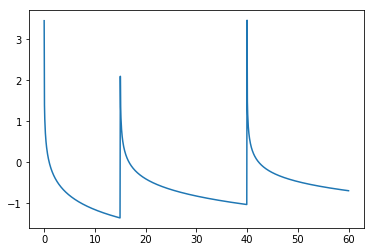

In [11]:
x = np.linspace(start = 0, stop = 60, num = 1000)
bl = []
for i in x:
    m.time = i + 0.001
    bl.append(m.get_activation(c2))
    
plt.plot(x, bl)

Plot the retrieval latency (directly related to activation) of c2:

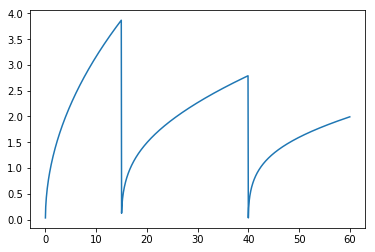

In [12]:
x = np.linspace(start = 0, stop = 60, num = 1000)
lat = []
for i in x:
    m.time = i + 0.001
    lat.append(m.get_latency(c2))
    
plt.plot(x, lat)

### Retrieval
Retrieve a chunk from memory defined by a retrieval pattern. We use chunk as a representation for that

In [13]:
pattern = Chunk(name = "retrieve", slots = {"type": "numbers", "val1" : 1})

In [19]:
chunk, latency = m.retrieve(pattern)
print(chunk)
print(latency)

Chunk c1
Slots: {'type': 'numbers', 'val1': 1, 'val2': 2, 'word': 'two'}
Encounters: [0, 35]
Fan: 0

0.41123548717809394


Retrieval failure example:

In [21]:
pattern = Chunk(name = "test", slots = {"type" : "letters"})
chunk, latency = m.retrieve(pattern)
print(chunk)
print(latency)

None
2.718281828459045
